In [ ]:
# Importar librerías necesarias
import pandas as pd
from etl import ejecutar_etl
from config import connect_databases

# Ejecutar el proceso ETL
ejecutar_etl()

# Ahora cargamos las tablas de hechos y dimensiones para hacer las preguntas

# Conectar a la base de datos ETL
db_op, db_etl = connect_databases()


DimCliente cargado correctamente.
DimMensajero cargado correctamente.
DimSede cargado correctamente.
DimCiudad cargado correctamente.
DimFecha cargado correctamente.
Tamaño de entregas: (28270, 12)
Tamaño de entregas: (28270, 13)
Tamaño de entregas: (28270, 7)
FactEntregasPorDia cargado correctamente.
FactEntregasPorHora cargado correctamente.
Index(['estados_servicio_id', 'fecha', 'hora', 'foto', 'observaciones',
       'estado_id', 'servicio_id', 'es_prueba_x', 'foto_binary',
       'descripcion_x', 'nombre_solicitante', 'fecha_solicitud',
       'hora_solicitud', 'fecha_deseada', 'hora_deseada', 'nombre_recibe',
       'telefono_recibe', 'descripcion_pago', 'ida_y_regreso', 'activo',
       'novedades', 'cliente_id', 'destino_id', 'mensajero_id', 'origen_id',
       'tipo_pago_id', 'tipo_servicio_id', 'tipo_vehiculo_id', 'usuario_id',
       'prioridad', 'ciudad_destino_id', 'ciudad_origen_id',
       'hora_visto_por_mensajero', 'visto_por_mensajero',
       'descripcion_multiples_o

## Cargar las tablas

In [25]:
import pandas as pd

# Cargar las tablas de hechos
F_novedades = pd.read_sql_table('FactNovedades', db_etl)
F_entregasPorDia = pd.read_sql_table('FactEntregasPorDia', db_etl)
F_entregasPorHora = pd.read_sql_table('FactEntregasPorHora', db_etl)
F_entregaEstados = pd.read_sql_table('FactEntregaEstados', db_etl)

In [26]:
# Cargar las tablas de Dimensiones

D_DimCiudad = pd.read_sql_table('DimCiudad', db_etl)
D_DimCliente = pd.read_sql_table('DimCliente', db_etl)
D_DimFecha = pd.read_sql_table('DimFecha', db_etl)
D_DimMensajero = pd.read_sql_table('DimMensajero', db_etl)
D_DimSede = pd.read_sql_table('DimSede', db_etl)

## 1) En qué meses del año los clientes solicitan más servicios de mensajería

Servicios por mes ordenados de mayor a menor:
+-----------+----------------------+
|    mes    | cantidad_solicitudes |
+-----------+----------------------+
|    May    |         4712         |
|   July    |         4603         |
|   April   |         4377         |
|  August   |         4376         |
|   June    |         4161         |
|   March   |         3301         |
| February  |         2369         |
|  January  |         290          |
| September |          46          |
| December  |          24          |
| November  |          6           |
|  October  |          5           |
+-----------+----------------------+


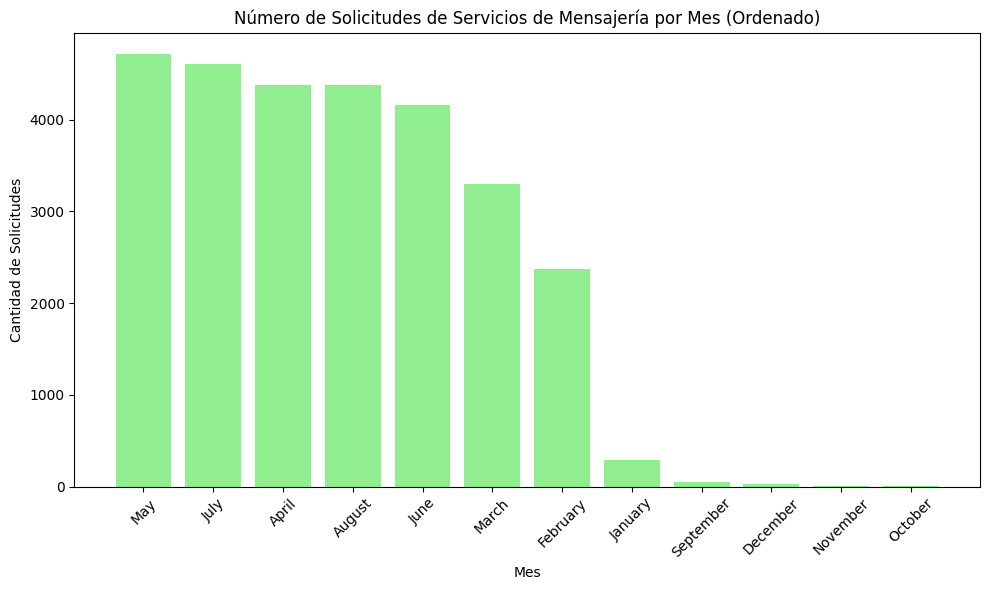

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Leer los datos desde la tabla 'FactEntregasPorDia'
fact_entregas = pd.read_sql('SELECT * FROM public."FactEntregasPorDia"', db_etl)

# Leer la tabla DimFecha para relacionar con los meses
dim_fecha = pd.read_sql('SELECT * FROM public."DimFecha"', db_etl)

# Relacionar FactEntregasPorDia con DimFecha usando el campo fecha_id
fact_entregas = fact_entregas.merge(dim_fecha[['fecha_id', 'mes']], on='fecha_id', how='left')

# Contar el número de servicios por mes
servicios_por_mes = fact_entregas.groupby('mes').size().reset_index(name='cantidad_solicitudes')

# Ordenar por cantidad de solicitudes de mayor a menor
servicios_por_mes = servicios_por_mes.sort_values('cantidad_solicitudes', ascending=False)

# Mostrar los resultados tabulados usando `tabulate`
print("Servicios por mes ordenados de mayor a menor:")
print(tabulate(servicios_por_mes, headers='keys', tablefmt='pretty', showindex=False))

# Graficar el número de solicitudes por mes
plt.figure(figsize=(10, 6))
plt.bar(servicios_por_mes['mes'], servicios_por_mes['cantidad_solicitudes'], color='lightgreen')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Solicitudes')
plt.title('Número de Solicitudes de Servicios de Mensajería por Mes (Ordenado)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2) Cuáles son los días donde más solicitudes hay.

Número de servicios por día de la semana (ordenados de mayor a menor):
+------------+------------------+
| dia_semana | numero_servicios |
+------------+------------------+
|  Tuesday   |       5391       |
|   Friday   |       5266       |
|  Thursday  |       5152       |
| Wednesday  |       4916       |
|   Monday   |       4294       |
|  Saturday  |       2458       |
|   Sunday   |       793        |
+------------+------------------+


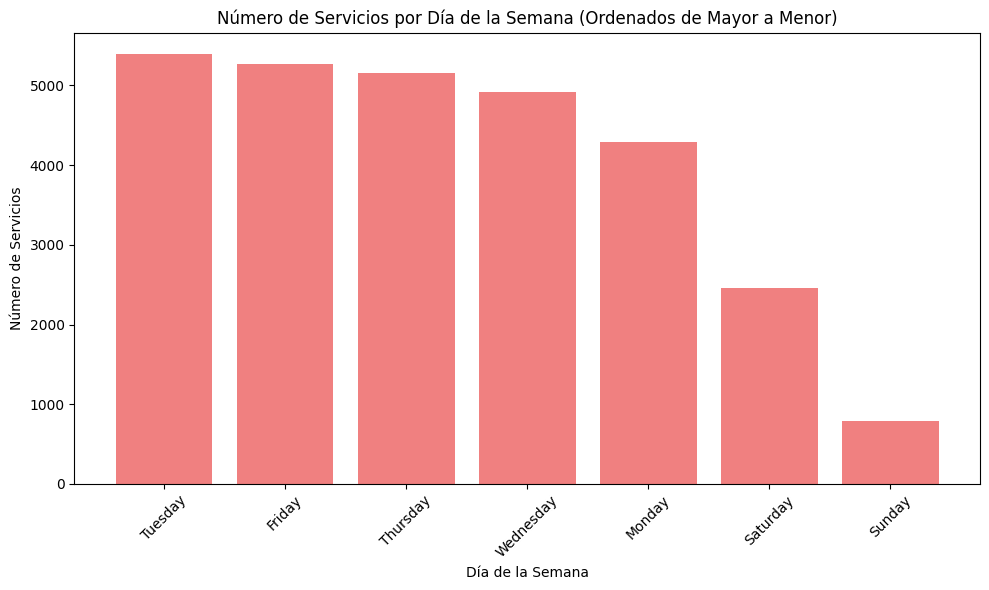

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Leer los datos desde la tabla 'FactEntregasPorDia'
fact_entregas = pd.read_sql('SELECT * FROM public."FactEntregasPorDia"', db_etl)

# Leer la tabla DimFecha para obtener los días de la semana
dim_fecha = pd.read_sql('SELECT * FROM public."DimFecha"', db_etl)

# Relacionar FactEntregasPorDia con DimFecha usando el campo fecha_id
fact_entregas = fact_entregas.merge(dim_fecha[['fecha_id', 'dia_semana']], on='fecha_id', how='left')

# Contar el número de servicios por día de la semana
servicios_por_dia = fact_entregas.groupby('dia_semana').size().reset_index(name='numero_servicios')

# Ordenar por número de servicios en orden descendente
servicios_por_dia = servicios_por_dia.sort_values(by='numero_servicios', ascending=False)

# Mostrar los resultados tabulados
print("Número de servicios por día de la semana (ordenados de mayor a menor):")
print(tabulate(servicios_por_dia, headers='keys', tablefmt='pretty', showindex=False))

# Graficar la cantidad de servicios por día de la semana
plt.figure(figsize=(10, 6))
plt.bar(servicios_por_dia['dia_semana'], servicios_por_dia['numero_servicios'], color='lightcoral')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Servicios')
plt.title('Número de Servicios por Día de la Semana (Ordenados de Mayor a Menor)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3) A qué hora los mensajeros están más ocupados.


Horas con más entregas completadas:
+------+----------------+
| hora | total_entregas |
+------+----------------+
| 9.0  |    69574.0     |
| 11.0 |    68384.0     |
| 10.0 |    53687.0     |
| 15.0 |    50175.0     |
| 14.0 |    45396.0     |
| 8.0  |    44759.0     |
| 16.0 |    33209.0     |
| 12.0 |    20037.0     |
| 13.0 |    14793.0     |
| 17.0 |    13608.0     |
| 7.0  |     7508.0     |
| 6.0  |     4468.0     |
| 18.0 |     1406.0     |
| 22.0 |     920.0      |
| 19.0 |     893.0      |
| 20.0 |     416.0      |
| 21.0 |     301.0      |
| 1.0  |     280.0      |
| 2.0  |     269.0      |
| 23.0 |     250.0      |
| 0.0  |     224.0      |
| 5.0  |     198.0      |
| 3.0  |     156.0      |
| 4.0  |     146.0      |
+------+----------------+


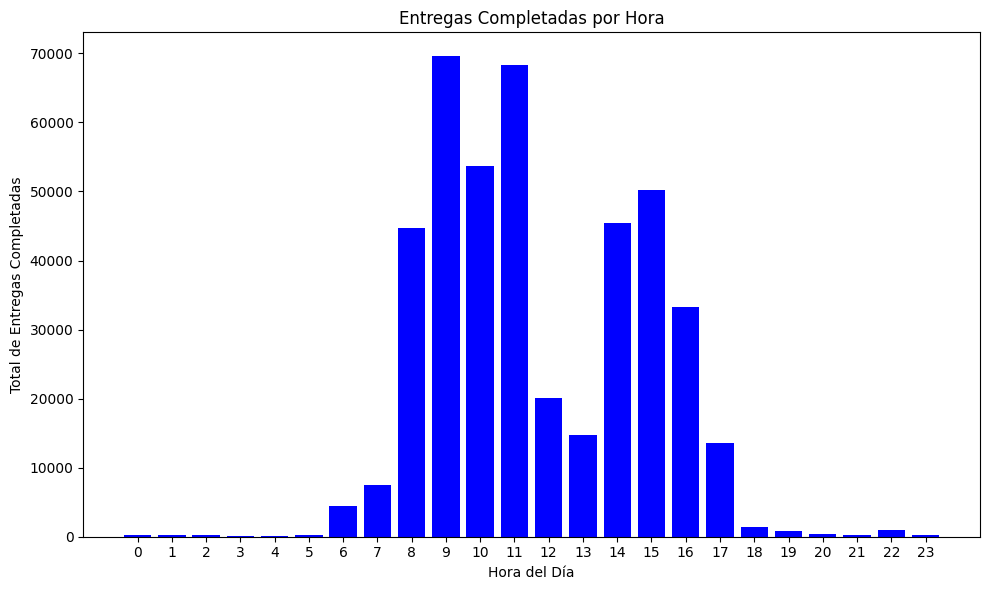

In [29]:

# Agrupar las entregas completadas por hora
entregas_por_hora = (
    F_entregasPorHora.groupby('hora')['entregas_completadas_hora']
    .sum()
    .reset_index(name='total_entregas')
)

# Ordenar las horas por la cantidad total de entregas, de mayor a menor
entregas_por_hora = entregas_por_hora.sort_values(by='total_entregas', ascending=False)

# Mostrar el resultado tabulado
print("Horas con más entregas completadas:")
print(tabulate(entregas_por_hora, headers='keys', tablefmt='pretty', showindex=False))

# Graficar el resultado
plt.figure(figsize=(10, 6))
plt.bar(entregas_por_hora['hora'], entregas_por_hora['total_entregas'], color='blue')
plt.xlabel('Hora del Día')
plt.ylabel('Total de Entregas Completadas')
plt.title('Entregas Completadas por Hora')
plt.xticks(range(24))  # Mostrar todas las horas del día en el eje X
plt.tight_layout()
plt.show()

## 4) Número de servicios solicitados por cliente y por mes

Número de servicios solicitados por cliente y por mes:
+-------------+-----------+------------------+------------+-----------------------------------------+
| key_cliente |    mes    | numero_servicios | cliente_id |                nombre_x                 |
+-------------+-----------+------------------+------------+-----------------------------------------+
|      3      |   April   |        46        |     3      |   BANCO REGIONAL  DE SANGRE BLOD-LIFE   |
|      3      |  August   |        28        |     3      |   BANCO REGIONAL  DE SANGRE BLOD-LIFE   |
|      3      | February  |        16        |     3      |   BANCO REGIONAL  DE SANGRE BLOD-LIFE   |
|      3      |   July    |        22        |     3      |   BANCO REGIONAL  DE SANGRE BLOD-LIFE   |
|      3      |   June    |        22        |     3      |   BANCO REGIONAL  DE SANGRE BLOD-LIFE   |
|      3      |   March   |        42        |     3      |   BANCO REGIONAL  DE SANGRE BLOD-LIFE   |
|      3      |    May    |

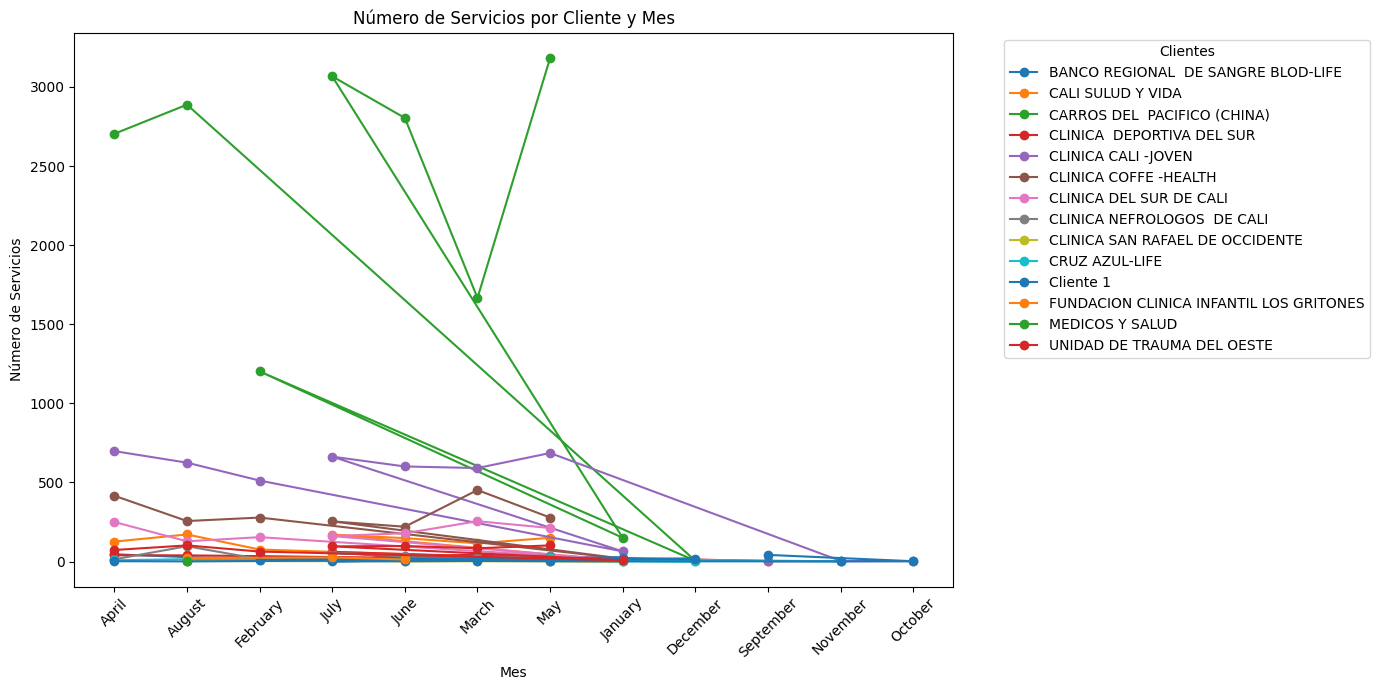

In [ ]:
# Convertir key_fecha a formato datetime
F_entregasPorHora['key_fecha'] = pd.to_datetime(F_entregasPorHora['key_fecha'])

# Extraer el nombre del mes
F_entregasPorHora['mes'] = F_entregasPorHora['key_fecha'].dt.month_name()

# Calcular la cantidad de servicios por cliente y mes
servicios_por_cliente_mes = (
    F_entregasPorHora.groupby(['key_cliente', 'mes'])
    .size()
    .reset_index(name='numero_servicios')
)

# Unir con los nombres de los clientes
servicios_por_cliente_mes = servicios_por_cliente_mes.merge(
    D_DimCliente[['cliente_id', 'nombre_x']],
    left_on='key_cliente',
    right_on='cliente_id',
    how='left'
)

# Ordenar por cliente y mes
servicios_por_cliente_mes = servicios_por_cliente_mes.sort_values(by=['nombre_x', 'mes'])

# Mostrar los datos tabulados
print("Número de servicios solicitados por cliente y por mes:")
print(tabulate(servicios_por_cliente_mes, headers='keys', tablefmt='pretty', showindex=False))

# Graficar los servicios por cliente y mes
plt.figure(figsize=(14, 7))
for cliente, group in servicios_por_cliente_mes.groupby('nombre_x'):
    plt.plot(group['mes'], group['numero_servicios'], label=cliente, marker='o')

plt.xlabel('Mes')
plt.ylabel('Número de Servicios')
plt.title('Número de Servicios por Cliente y Mes')
plt.xticks(rotation=45)
plt.legend(title='Clientes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## 5) Mensajeros más eficientes (Los que más servicios prestan)


+-----------+------------------+
| mensajero | numero_servicios |
+-----------+------------------+
|   30.0    |      2465.0      |
|   29.0    |      1753.0      |
|   15.0    |      1714.0      |
|   25.0    |      1509.0      |
|   41.0    |      1499.0      |
|   31.0    |      1487.0      |
|   22.0    |      1409.0      |
|   42.0    |      1408.0      |
|   16.0    |      1365.0      |
|   28.0    |      1357.0      |
|   11.0    |      1207.0      |
|    8.0    |      1206.0      |
|   27.0    |      1194.0      |
|    3.0    |      1031.0      |
|   18.0    |      980.0       |
|   44.0    |      943.0       |
|   34.0    |      827.0       |
|   32.0    |      774.0       |
|   45.0    |      762.0       |
|   38.0    |      707.0       |
|    4.0    |      613.0       |
|   24.0    |      594.0       |
|   36.0    |      572.0       |
|   12.0    |      461.0       |
|   48.0    |      450.0       |
|    5.0    |      197.0       |
|   23.0    |      180.0       |
|   47.0  

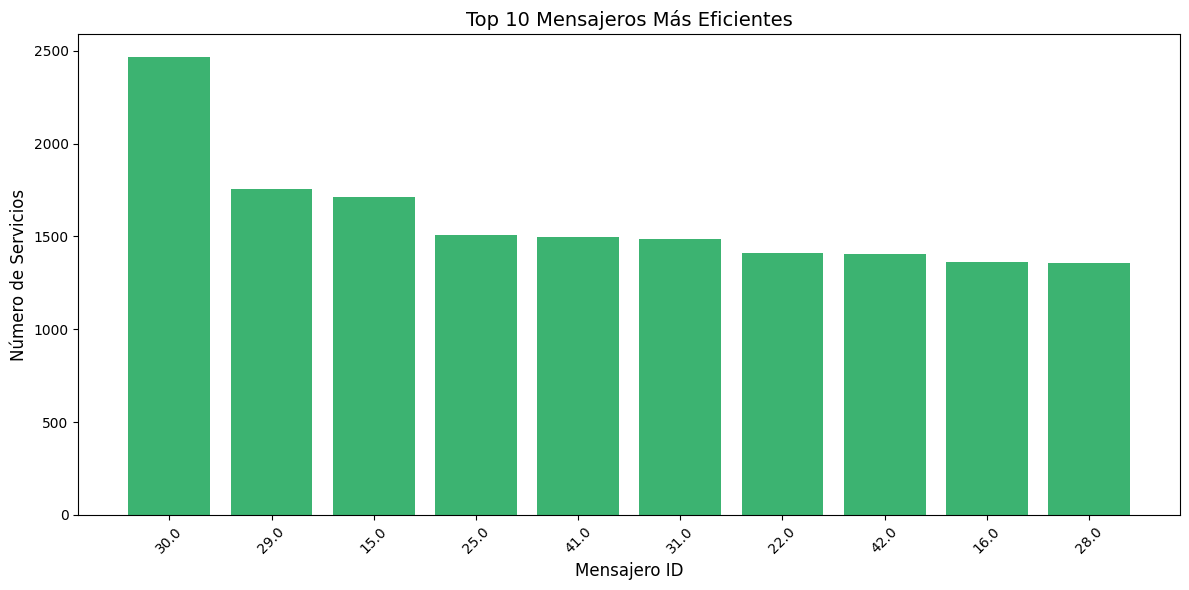

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Contar la cantidad de servicios realizados por cada mensajero
mensajeros_eficientes = F_entregaEstados[['mensajero_id','mensajero2_id','mensajero3_id']]

mensajeros_eficientes = mensajeros_eficientes.melt(value_name='mensajero')['mensajero'].dropna().reset_index(drop=True)

mensajeros_eficientes = mensajeros_eficientes.value_counts().reset_index()
mensajeros_eficientes.rename(columns={'count':'numero_servicios'},inplace=True)

############

# Mostrar los resultados en formato tabular
print(tabulate(mensajeros_eficientes, headers='keys', tablefmt='pretty', showindex=False))

# Visualizar los mensajeros más eficientes (top 10)
plt.figure(figsize=(12, 6))
plt.bar(
    mensajeros_eficientes['mensajero'].head(10).astype(str),
    mensajeros_eficientes['numero_servicios'].head(10),
    color='mediumseagreen'
)
plt.xlabel('Mensajero ID', fontsize=12)
plt.ylabel('Número de Servicios', fontsize=12)
plt.title('Top 10 Mensajeros Más Eficientes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [32]:
mensajeros_eficientes.head(47)

,mensajero,numero_servicios
0,30.0,2465
1,29.0,1753
2,15.0,1714
3,25.0,1509
4,41.0,1499
5,31.0,1487
6,22.0,1409
7,42.0,1408
8,16.0,1365
9,28.0,1357


## 6) Cuáles son las sedes que más servicios solicitan por cada cliente.

+------------+-----------------------------------------+---------+----------------------------------+-----------------+
| id_cliente |             nombre_cliente              | id_sede |           nombre_sede            | total_servicios |
+------------+-----------------------------------------+---------+----------------------------------+-----------------+
|     11     |      CARROS DEL  PACIFICO (CHINA)       |   24    |         PASTO VITRINA /          |      2508       |
|     11     |      CARROS DEL  PACIFICO (CHINA)       |   25    |         PASTO BODEGA 29/         |      2287       |
|     11     |      CARROS DEL  PACIFICO (CHINA)       |   26    |       PALMIRA BODEGA 20  /       |      1841       |
|     4      |             CRUZ AZUL-LIFE              |   13    |         DIME / LOS ROJOS         |      1054       |
|     10     |          CLINICA VIDA Y SALUD           |   28    |      CONTRIBUTIVO / ESENSA       |       925       |
|     11     |      CARROS DEL  PACIFICO

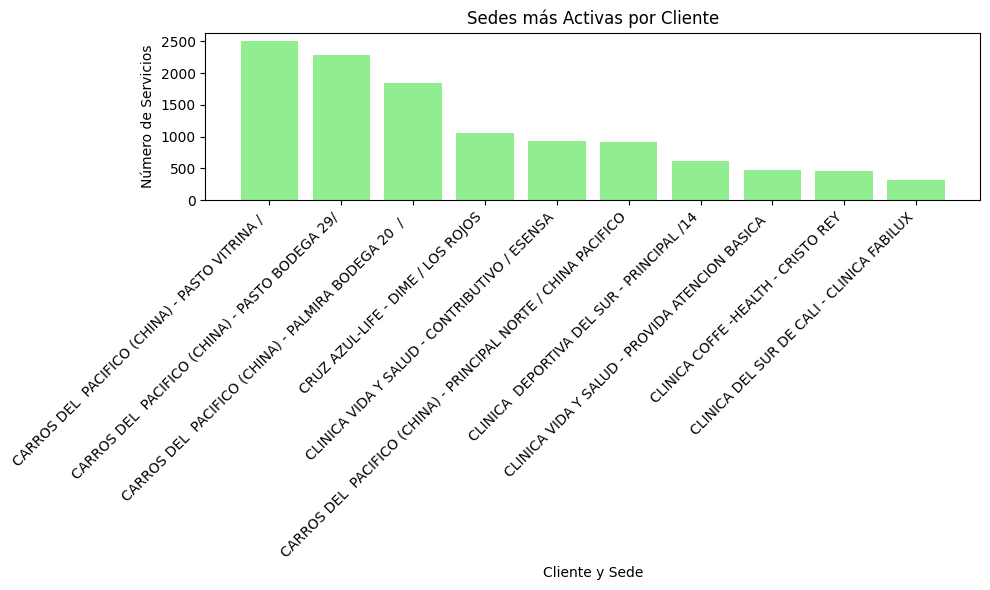

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from config import connect_databases

# Conectar a las bases de datos
db_op, db_etl = connect_databases()

# Consulta SQL para obtener las sedes más activas por cliente
query = """
    SELECT
        cl.cliente_id AS id_cliente,
        cl.nombre AS nombre_cliente,
        sd.sede_id AS id_sede,
        sd.nombre AS nombre_sede,
        COUNT(ms.id) AS total_servicios
    FROM
        mensajeria_servicio ms
    JOIN
        sede sd ON ms.origen_id = sd.sede_id
    JOIN
        cliente cl ON sd.cliente_id = cl.cliente_id
    WHERE
        ms.activo = true
    GROUP BY
        cl.cliente_id, cl.nombre, sd.sede_id, sd.nombre
    ORDER BY
        total_servicios DESC, cl.nombre, sd.nombre;
"""

# Ejecutar la consulta
sedes_mas_activas = pd.read_sql_query(query, db_op)

# Asegúrate de que 'total_servicios' es de tipo numérico
sedes_mas_activas['total_servicios'] = pd.to_numeric(sedes_mas_activas['total_servicios'], errors='coerce')

# Agrupar por id_cliente y sede, y contar los servicios únicos si es necesario
sedes_mas_activas_agrupadas = sedes_mas_activas.groupby(
    ['id_cliente', 'nombre_cliente', 'id_sede', 'nombre_sede']
).agg(
    total_servicios=('total_servicios', 'sum')  # Sumar los servicios si hay duplicados
).reset_index()

# Asegurarse de que 'total_servicios' es numérico
sedes_mas_activas_agrupadas['total_servicios'] = pd.to_numeric(sedes_mas_activas_agrupadas['total_servicios'], errors='coerce')

# Ordenar los resultados de forma descendente por 'total_servicios' y 'id_cliente'
sedes_mas_activas_agrupadas = sedes_mas_activas_agrupadas.sort_values(
    by=['total_servicios', 'id_cliente'], ascending=[False, True]
)

print(tabulate(sedes_mas_activas_agrupadas, headers='keys', tablefmt='pretty', showindex=False))

# Graficar los resultados
plt.figure(figsize=(10, 6))

sedes_mas_activas_agrupadas['etiqueta'] = sedes_mas_activas_agrupadas['nombre_cliente'] + ' - ' + sedes_mas_activas_agrupadas['nombre_sede']

max_labels = 10  # Ajustar las sedes
sedes_mas_activas_agrupadas = sedes_mas_activas_agrupadas.head(max_labels)

# Crear el gráfico de barras
plt.bar(sedes_mas_activas_agrupadas['etiqueta'], sedes_mas_activas_agrupadas['total_servicios'], color='lightgreen')

plt.xlabel('Cliente y Sede')
plt.ylabel('Número de Servicios')
plt.title('Sedes más Activas por Cliente')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Mostrar el gráfico
plt.show()


## 7) Cuál es el tiempo promedio de entrega desde que se solicita el servicio hasta que se cierra el caso. 

In [34]:
import pandas as pd

# Función para convertir timedelta a minutos totales
def timedelta_to_minutes(td):
    if pd.isnull(td):  # Manejar valores NaT
        return None
    try:
        return td.days * 24 * 60 + td.seconds / 60  # Convertir días y segundos a minutos
    except AttributeError:
        return None

# Convertir las columnas de tiempo (si están en formato cadena) a timedelta
F_entregaEstados['tiempo_iniciado_asignado'] = pd.to_timedelta(F_entregaEstados['tiempo_iniciado_asignado'], errors='coerce')
F_entregaEstados['tiempo_asignado_recogido'] = pd.to_timedelta(F_entregaEstados['tiempo_asignado_recogido'], errors='coerce')
F_entregaEstados['tiempo_recogido_entregado'] = pd.to_timedelta(F_entregaEstados['tiempo_recogido_entregado'], errors='coerce')
F_entregaEstados['tiempo_entregado_finalizado'] = pd.to_timedelta(F_entregaEstados['tiempo_entregado_finalizado'], errors='coerce')

# Convertir las columnas de tiempo a minutos totales
F_entregaEstados['tiempo_iniciado_asignado_min'] = F_entregaEstados['tiempo_iniciado_asignado'].apply(timedelta_to_minutes)
F_entregaEstados['tiempo_asignado_recogido_min'] = F_entregaEstados['tiempo_asignado_recogido'].apply(timedelta_to_minutes)
F_entregaEstados['tiempo_recogido_entregado_min'] = F_entregaEstados['tiempo_recogido_entregado'].apply(timedelta_to_minutes)
F_entregaEstados['tiempo_entregado_finalizado_min'] = F_entregaEstados['tiempo_entregado_finalizado'].apply(timedelta_to_minutes)

# Calcular el tiempo total desde iniciado hasta finalizado
F_entregaEstados['tiempo_total_min'] = (
    F_entregaEstados['tiempo_iniciado_asignado_min'] +
    F_entregaEstados['tiempo_asignado_recogido_min'] +
    F_entregaEstados['tiempo_recogido_entregado_min'] +
    F_entregaEstados['tiempo_entregado_finalizado_min']
)

# Mostrar los resultados intermedios
#print(F_entregaEstados[['tiempo_iniciado_asignado_min', 'tiempo_total_min']].head(10))

# Filtrar filas válidas (tiempo total no nulo)
F_entregaEstados_validos = F_entregaEstados.dropna(subset=['tiempo_total_min'])

# Calcular el promedio del tiempo total
if not F_entregaEstados_validos.empty:
    tiempo_promedio_total = F_entregaEstados_validos['tiempo_total_min'].mean()
    print(f"Tiempo promedio desde inicio hasta finalización: {tiempo_promedio_total:.2f} minutos")
else:
    print("No hay datos válidos para calcular el tiempo promedio.")


Tiempo promedio desde inicio hasta finalización: 758.34 minutos


## 8) Mostrar los tiempos de espera por cada fase del servicio: Iniciado, Con mensajero asignado, recogido en origen, Entregado en Destino, Cerrado. En que fase del servicio hay más demoras?

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurémonos de que las columnas de tiempo estén en formato timedelta
F_entregaEstados['tiempo_iniciado_asignado'] = pd.to_timedelta(F_entregaEstados['tiempo_iniciado_asignado'], errors='coerce')
F_entregaEstados['tiempo_asignado_recogido'] = pd.to_timedelta(F_entregaEstados['tiempo_asignado_recogido'], errors='coerce')
F_entregaEstados['tiempo_recogido_entregado'] = pd.to_timedelta(F_entregaEstados['tiempo_recogido_entregado'], errors='coerce')
F_entregaEstados['tiempo_entregado_finalizado'] = pd.to_timedelta(F_entregaEstados['tiempo_entregado_finalizado'], errors='coerce')

# Convertir los tiempos a minutos para facilitar el análisis
F_entregaEstados['tiempo_iniciado_asignado_min'] = F_entregaEstados['tiempo_iniciado_asignado'].dt.total_seconds() / 60
F_entregaEstados['tiempo_asignado_recogido_min'] = F_entregaEstados['tiempo_asignado_recogido'].dt.total_seconds() / 60
F_entregaEstados['tiempo_recogido_entregado_min'] = F_entregaEstados['tiempo_recogido_entregado'].dt.total_seconds() / 60
F_entregaEstados['tiempo_entregado_finalizado_min'] = F_entregaEstados['tiempo_entregado_finalizado'].dt.total_seconds() / 60

F_entregaEstados.head()


,servicio_id,tipo_servicio,mensajero_id,mensajero2_id,mensajero3_id,cliente_id,hora_iniciado_id,hora_asignado_id,hora_recogido_id,hora_entregado_id,...,hora_novedad_id,tiempo_iniciado_asignado,tiempo_asignado_recogido,tiempo_recogido_entregado,tiempo_entregado_finalizado,tiempo_iniciado_asignado_min,tiempo_asignado_recogido_min,tiempo_recogido_entregado_min,tiempo_entregado_finalizado_min,tiempo_total_min
0,7,Comercial,1.0,7.0,NaN,5,28572.0,28938.0,28957.0,28958.0,...,NaN,24 days 01:29:02,17 days 18:11:28,0 days 05:05:07,-1 days +19:08:05,34649.033333,25571.466667,305.116667,-291.916667,60233.7
1,8,Administrativo,7.0,NaN,NaN,5,28573.0,29063.0,34173.0,62754.0,...,NaN,92 days 03:44:38,55 days 19:19:35,55 days 00:34:17,NaT,132704.633333,80359.583333,79234.283333,NaN,NaN
2,9,Administrativo,7.0,NaN,NaN,5,28573.0,29114.0,NaN,NaN,...,NaN,100 days 03:02:56,NaT,NaT,NaT,144182.933333,NaN,NaN,NaN,NaN
3,10,Comercial,7.0,NaN,NaN,5,28576.0,29116.0,35657.0,46316.0,...,NaN,100 days 02:57:15,51 days 04:48:40,21 days 09:36:40,NaT,144177.250000,73728.666667,30816.666667,NaN,NaN
4,11,Comercial,7.0,NaN,NaN,5,28577.0,29037.0,30424.0,NaN,...,NaN,80 days 20:36:05,52 days 21:15:56,NaT,NaT,116436.083333,76155.933333,NaN,NaN,NaN


{'Iniciado a Asignado': np.float64(149.05163712501354), 'Asignado a Recogido': np.float64(107.87708765176191), 'Recogido a Entregado': np.float64(107.93018688236677), 'Entregado a Finalizado': np.float64(294.56309566895885)}
Promedios de tiempos de espera por fase (en minutos):
Tiempo promedio de espera en la fase 'Iniciado a Asignado': 149.05 minutos
Tiempo promedio de espera en la fase 'Asignado a Recogido': 107.88 minutos
Tiempo promedio de espera en la fase 'Recogido a Entregado': 107.93 minutos
Tiempo promedio de espera en la fase 'Entregado a Finalizado': 294.56 minutos

La fase con mayor demora es: 'Entregado a Finalizado'


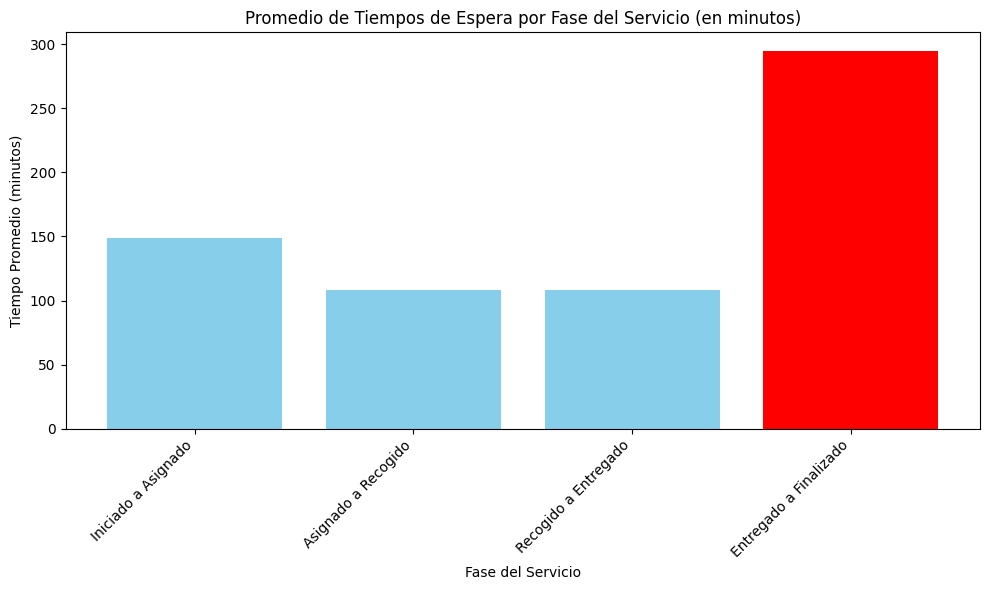

In [36]:

# Calcular el promedio de tiempo para cada fase
promedios_fases = {
    'Iniciado a Asignado': F_entregaEstados['tiempo_iniciado_asignado_min'].mean(),
    'Asignado a Recogido': F_entregaEstados['tiempo_asignado_recogido_min'].mean(),
    'Recogido a Entregado': F_entregaEstados['tiempo_recogido_entregado_min'].mean(),
    'Entregado a Finalizado': F_entregaEstados['tiempo_entregado_finalizado_min'].mean()
}
print(promedios_fases)
# Mostrar los promedios de los tiempos
print("Promedios de tiempos de espera por fase (en minutos):")
for fase, tiempo in promedios_fases.items():
    print(f"Tiempo promedio de espera en la fase '{fase}': {tiempo:.2f} minutos")

# Identificar la fase con mayor demora
fase_mayor_demora = max(promedios_fases, key=promedios_fases.get)
print(f"\nLa fase con mayor demora es: '{fase_mayor_demora}'")

# Definir colores: resaltar la fase con más demora en un color distinto
colores = ['skyblue' if fase != fase_mayor_demora else 'red' for fase in promedios_fases.keys()]

# Graficar los tiempos promedio por fase
plt.figure(figsize=(10, 6))
plt.bar(promedios_fases.keys(), promedios_fases.values(), color=colores)

# Personalizar el gráfico
plt.title("Promedio de Tiempos de Espera por Fase del Servicio (en minutos)")
plt.xlabel("Fase del Servicio")
plt.ylabel("Tiempo Promedio (minutos)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## 9) Cuáles son las novedades que más se presentan durante la prestación del servicio?

Las novedades más frecuentes durante la prestación del servicio son:
+------------------------+----------+
|    Tipo de Novedad     | Cantidad |
+------------------------+----------+
| Novedades del servicio |   3892   |
|   No puedo continuar   |   1316   |
+------------------------+----------+


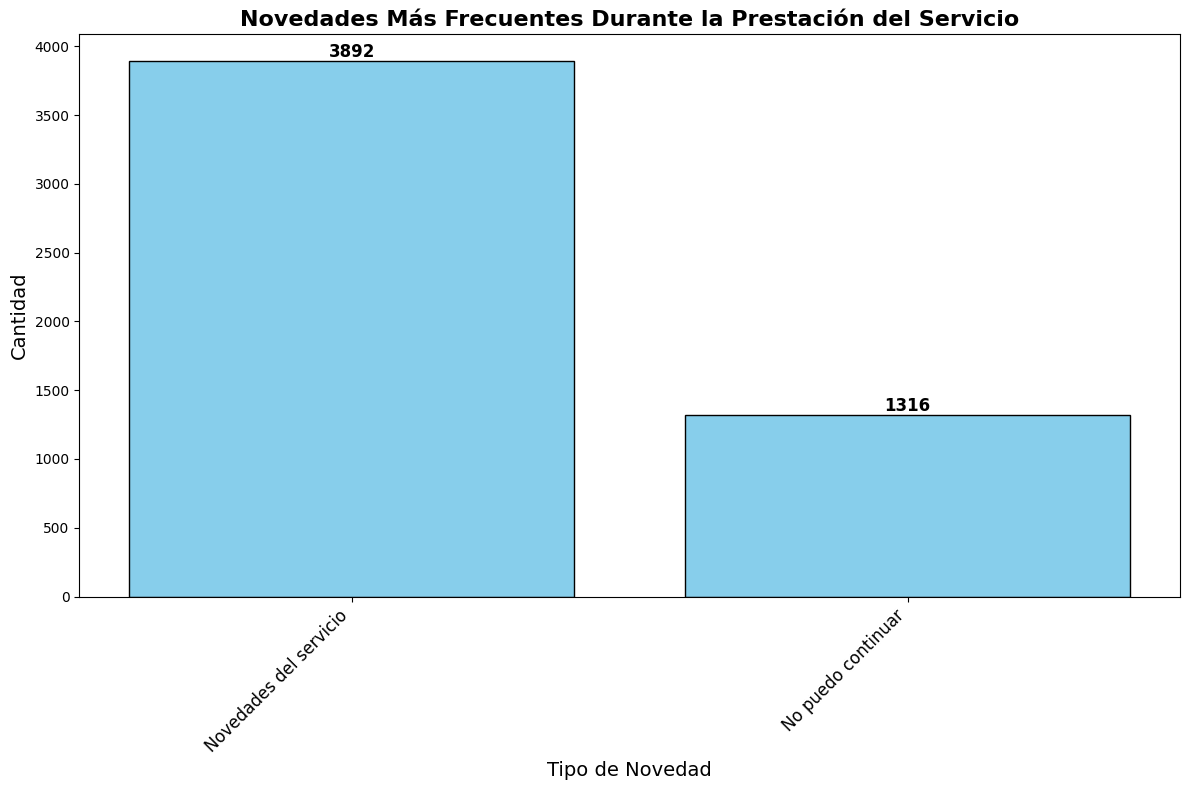

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar las novedades
novedades_frecuentes = F_novedades['tipo_novedad'].value_counts()

# Renombrar la serie para mayor claridad
novedades_frecuentes = novedades_frecuentes.reset_index()
novedades_frecuentes.columns = ['Tipo de Novedad', 'Cantidad']

# Mostrar las novedades más frecuentes
print("Las novedades más frecuentes durante la prestación del servicio son:")
print(tabulate(novedades_frecuentes, headers='keys', tablefmt='pretty', showindex=False))

plt.figure(figsize=(12, 8))  

# Crear un gráfico de barras 
bars = plt.bar(novedades_frecuentes['Tipo de Novedad'], novedades_frecuentes['Cantidad'], color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.title('Novedades Más Frecuentes Durante la Prestación del Servicio', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Novedad', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(int(yval)), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()

# Mostrar el gráfico
plt.show()
